In this dataset targeted variable has been predicted by using different supervised Machine learning techniques      
> 1.logistic regression      
> 2.decision tree 

**bagging technique**     
>> random forest  

**boosting tecniques**    
>> Adaboost   
>> Xgboost   

### import the reliable packages 

In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import scipy.stats as sc
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split, RandomizedSearchCV,GridSearchCV
from sklearn.preprocessing import StandardScaler, minmax_scale,MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

### import the reliable packages 

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'h1n1_vaccine_prediction.csv',
 'heart disease.ipynb',
 'HeartDisease.csv',
 'knn class.ipynb',
 'KNN.ipynb',
 'Mobile_data.csv',
 'Problem Statement_LogisticReg.pdf',
 'vaccine usage prediction.ipynb']

In [3]:
heart=pd.read_csv(r'HeartDisease.csv') # loading the dataset

In [4]:
heart.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### taking a look at summary of dataset
>> **_investigating the outliers_**

In [5]:
heart.describe(percentiles=[.01,.015,.02,.1,.2,.3,.4,.5,.6,.7,.8,.9,.95,.96,.98,.99]).T

,count,mean,std,min,1%,1.5%,2%,10%,20%,30%,...,50%,60%,70%,80%,90%,95%,96%,98%,99%,max
age,303.0,54.366337,9.082101,29.0,35.00,35.00,35.08,42.0,45.0,50.0,...,55.0,58.00,59.0,62.0,66.0,68.0,68.920,70.00,71.00,77.0
gender,303.0,0.683168,0.466011,0.0,0.00,0.00,0.00,0.0,0.0,0.0,...,1.0,1.00,1.0,1.0,1.0,1.0,1.000,1.00,1.00,1.0
chest_pain,303.0,0.966997,1.032052,0.0,0.00,0.00,0.00,0.0,0.0,0.0,...,1.0,1.00,2.0,2.0,2.0,3.0,3.000,3.00,3.00,3.0
rest_bps,303.0,131.623762,17.538143,94.0,100.00,100.00,101.04,110.0,120.0,120.0,...,130.0,134.00,140.0,144.0,152.0,160.0,169.600,177.84,180.00,200.0
cholestrol,303.0,246.264026,51.830751,126.0,149.00,153.24,160.16,188.0,204.0,217.6,...,240.0,254.00,268.0,285.2,308.8,326.9,334.600,353.96,406.74,564.0
fasting_blood_sugar,303.0,0.148515,0.356198,0.0,0.00,0.00,0.00,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,1.0,1.0,1.000,1.00,1.00,1.0
rest_ecg,303.0,0.528053,0.525860,0.0,0.00,0.00,0.00,0.0,0.0,0.0,...,1.0,1.00,1.0,1.0,1.0,1.0,1.000,1.00,1.98,2.0
thalach,303.0,149.646865,22.905161,71.0,95.02,96.00,97.08,116.0,130.0,140.6,...,153.0,159.00,163.0,170.0,176.6,181.9,182.000,186.96,191.96,202.0
exer_angina,303.0,0.326733,0.469794,0.0,0.00,0.00,0.00,0.0,0.0,0.0,...,0.0,0.00,1.0,1.0,1.0,1.0,1.000,1.00,1.00,1.0
old_peak,303.0,1.039604,1.161075,0.0,0.00,0.00,0.00,0.0,0.0,0.0,...,0.8,1.12,1.4,1.9,2.8,3.4,3.592,4.00,4.20,6.2


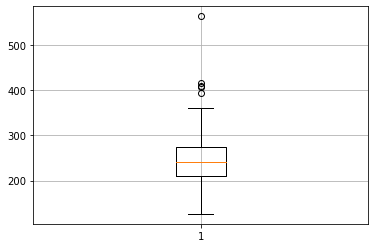

In [6]:
plt.boxplot(heart['cholestrol'])
plt.grid()

In [7]:
heart.info() #obsreving data types 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### investigating the null values 

In [8]:
heart.isnull().sum().sort_values() 

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

In [9]:
heart["cholestrol"]=np.where(heart['cholestrol']>350,350,heart['cholestrol']) #cap the outlier of cholestrol at .99 percentile

In [10]:
heart.describe(percentiles=[.01,.015,.02,.1,.2,.3,.4,.5,.6,.7,.8,.9,.95,.96,.98,.99]).T

,count,mean,std,min,1%,1.5%,2%,10%,20%,30%,...,50%,60%,70%,80%,90%,95%,96%,98%,99%,max
age,303.0,54.366337,9.082101,29.0,35.00,35.00,35.08,42.0,45.0,50.0,...,55.0,58.00,59.0,62.0,66.0,68.0,68.920,70.00,71.00,77.0
gender,303.0,0.683168,0.466011,0.0,0.00,0.00,0.00,0.0,0.0,0.0,...,1.0,1.00,1.0,1.0,1.0,1.0,1.000,1.00,1.00,1.0
chest_pain,303.0,0.966997,1.032052,0.0,0.00,0.00,0.00,0.0,0.0,0.0,...,1.0,1.00,2.0,2.0,2.0,3.0,3.000,3.00,3.00,3.0
rest_bps,303.0,131.623762,17.538143,94.0,100.00,100.00,101.04,110.0,120.0,120.0,...,130.0,134.00,140.0,144.0,152.0,160.0,169.600,177.84,180.00,200.0
cholestrol,303.0,244.752475,46.624839,126.0,149.00,153.24,160.16,188.0,204.0,217.6,...,240.0,254.00,268.0,285.2,308.8,326.9,334.600,350.00,350.00,350.0
fasting_blood_sugar,303.0,0.148515,0.356198,0.0,0.00,0.00,0.00,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,1.0,1.0,1.000,1.00,1.00,1.0
rest_ecg,303.0,0.528053,0.525860,0.0,0.00,0.00,0.00,0.0,0.0,0.0,...,1.0,1.00,1.0,1.0,1.0,1.0,1.000,1.00,1.98,2.0
thalach,303.0,149.646865,22.905161,71.0,95.02,96.00,97.08,116.0,130.0,140.6,...,153.0,159.00,163.0,170.0,176.6,181.9,182.000,186.96,191.96,202.0
exer_angina,303.0,0.326733,0.469794,0.0,0.00,0.00,0.00,0.0,0.0,0.0,...,0.0,0.00,1.0,1.0,1.0,1.0,1.000,1.00,1.00,1.0
old_peak,303.0,1.039604,1.161075,0.0,0.00,0.00,0.00,0.0,0.0,0.0,...,0.8,1.12,1.4,1.9,2.8,3.4,3.592,4.00,4.20,6.2


### Exploratory Analysis

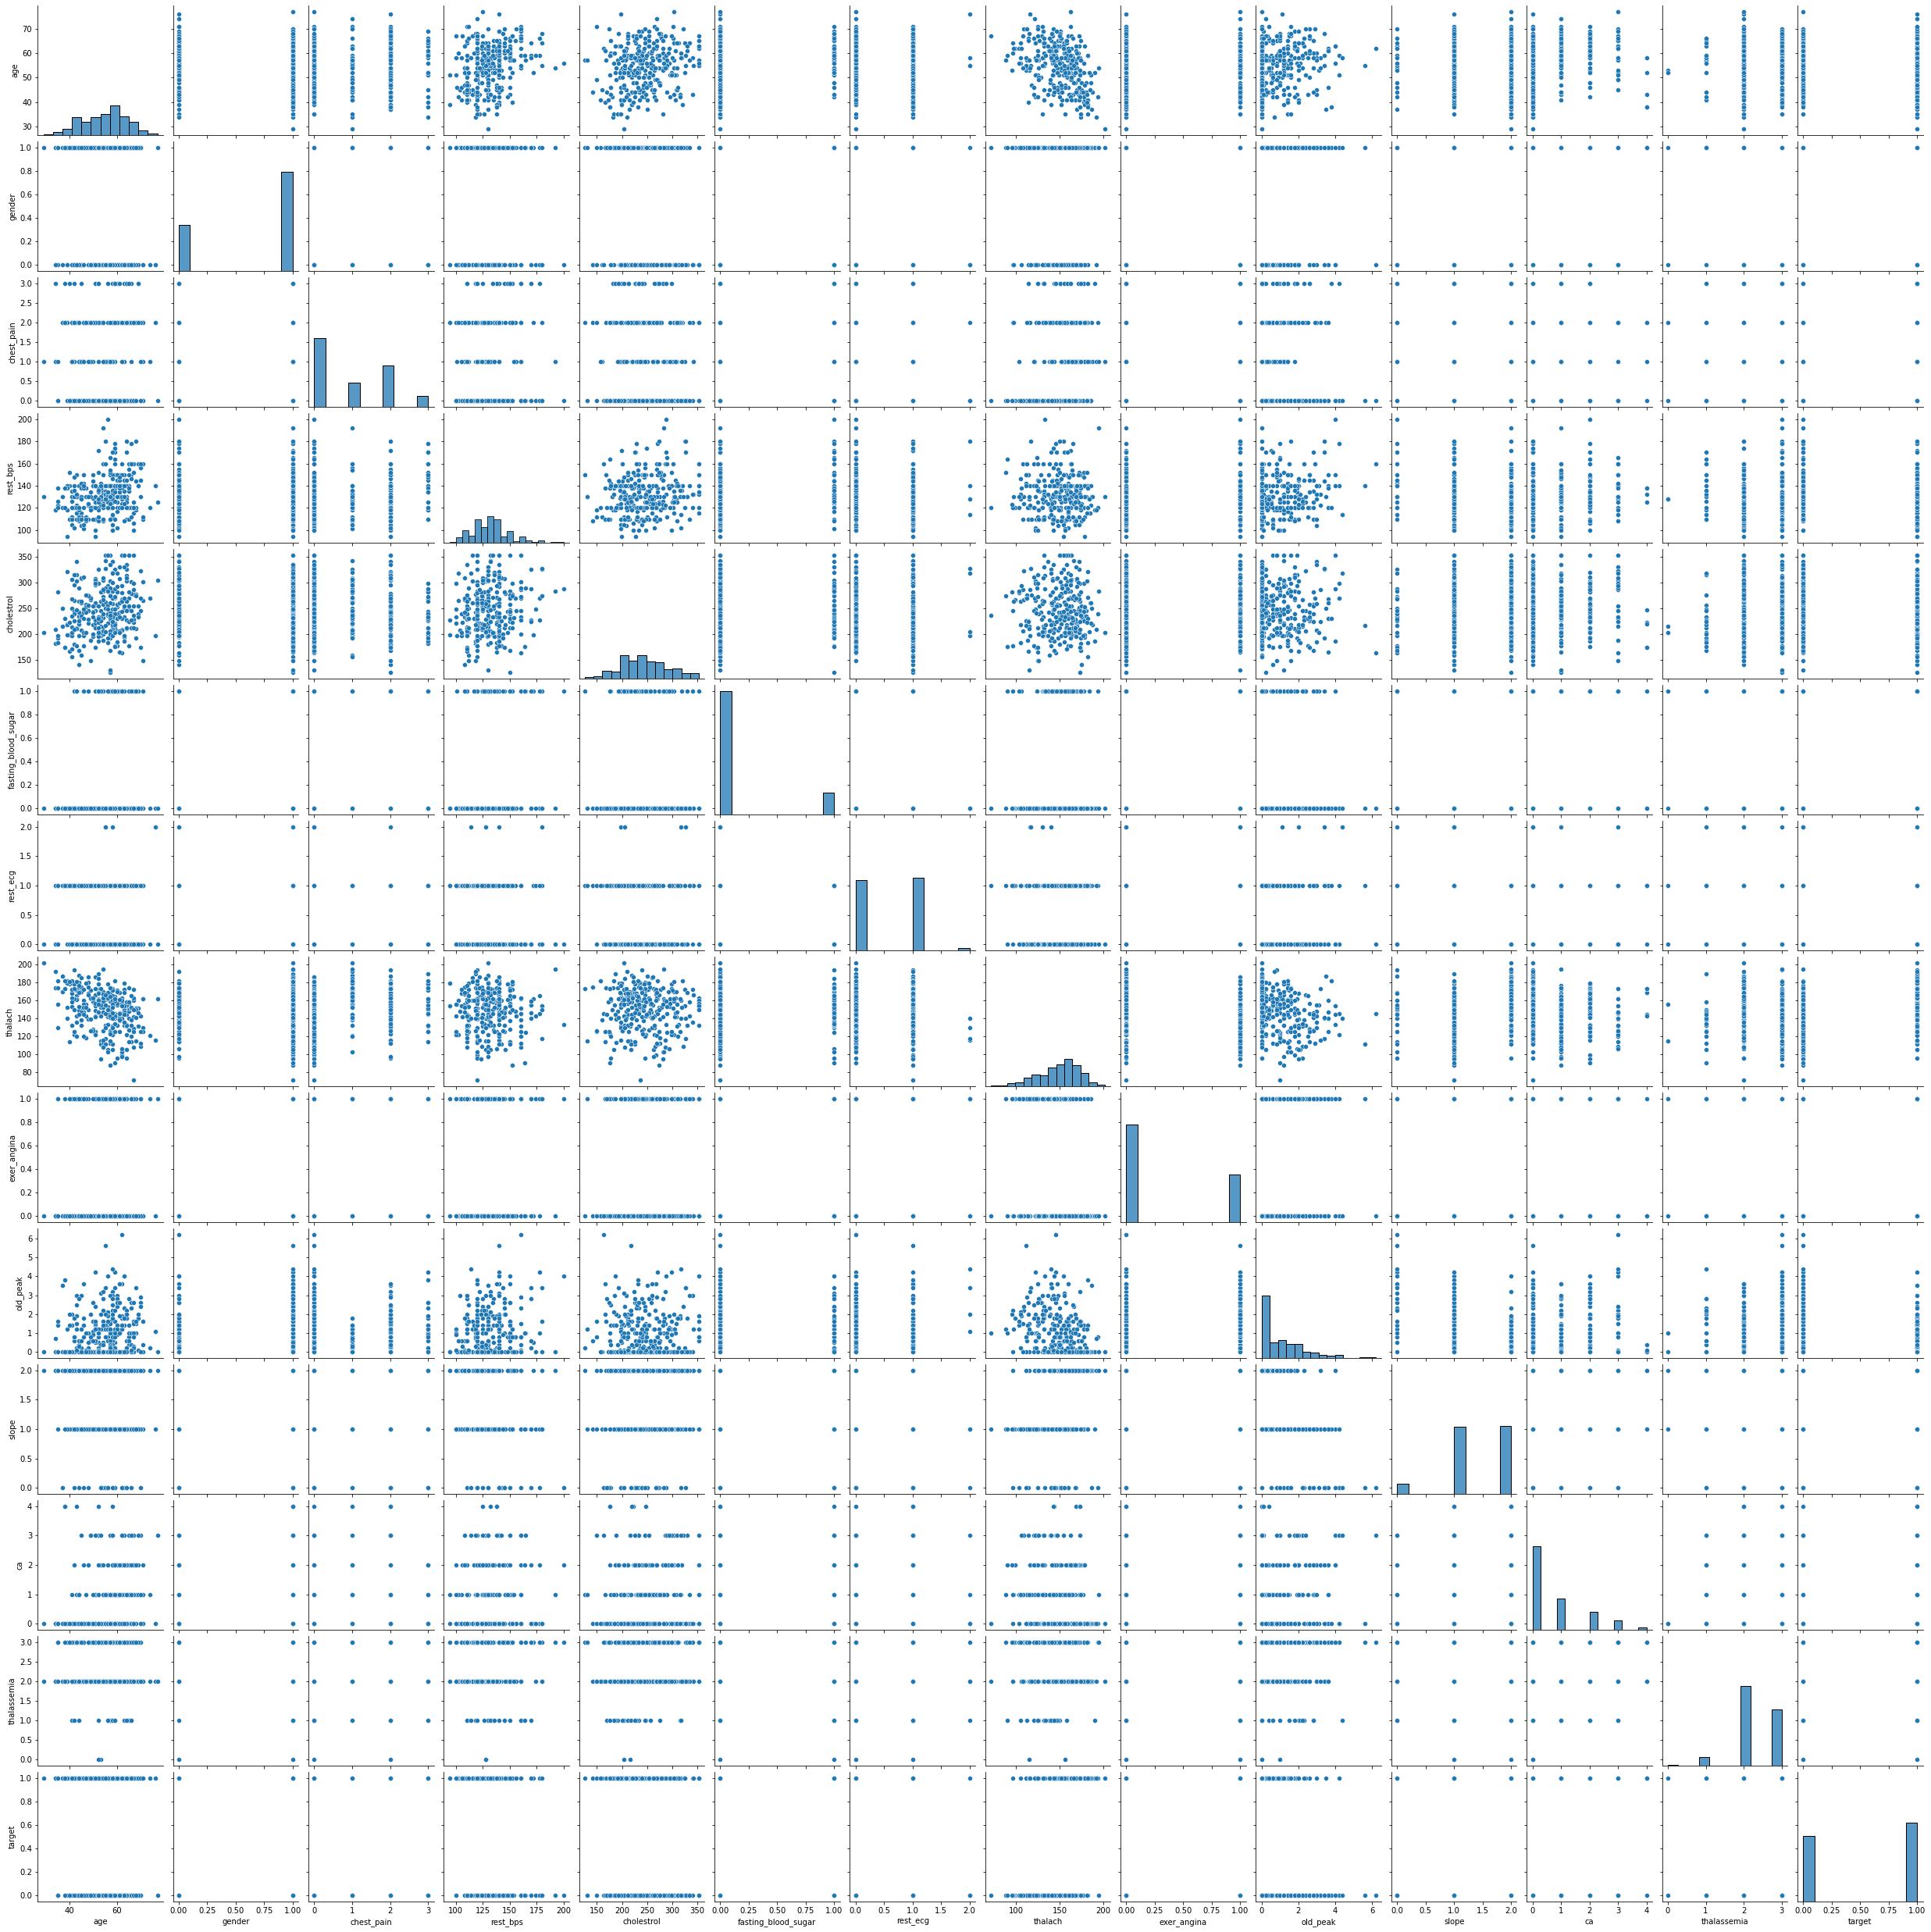

In [47]:
sns.pairplot(heart)

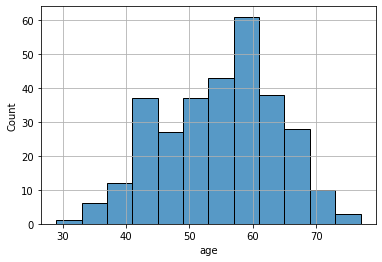

In [55]:
sns.histplot(heart["age"])
plt.grid()
plt.show()

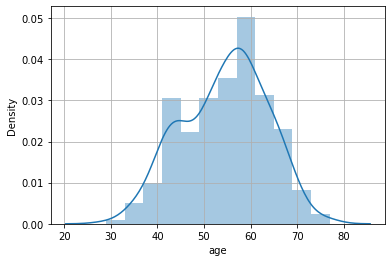

In [24]:
sns.distplot(heart["age"])
plt.grid()
plt.show()

####  _From the above histogram we can se that the people at the age of 60 are frequently high in the dataset_

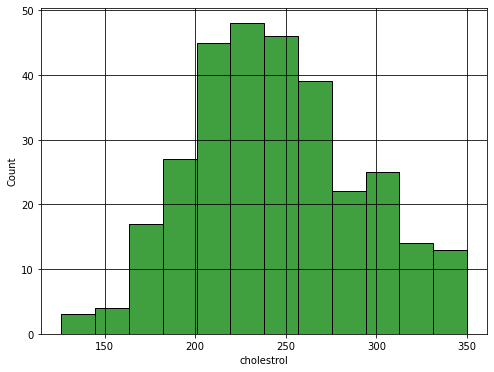

In [11]:
plt.figure(figsize=(8,6))
sns.histplot(heart["cholestrol"],color="g")
plt.grid(color="black")
plt.show()

####  _from the above visuals we can perceive that people having cholestrol between 200 to 250 are frequent in dataset_

In [12]:
heart_pivot=heart.pivot_table(index="age",values='cholestrol').reset_index()

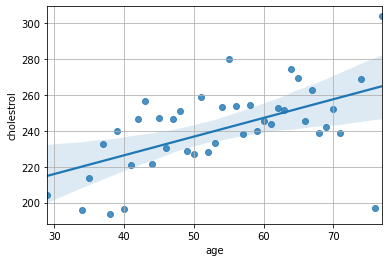

In [13]:
sns.regplot(heart_pivot['age'],heart_pivot['cholestrol'])
plt.grid()
plt.show()

In [14]:
heart[["cholestrol","age"]].corr()

,cholestrol,age
cholestrol,1.000000,0.202667
age,0.202667,1.000000


<Figure size 576x504 with 0 Axes>

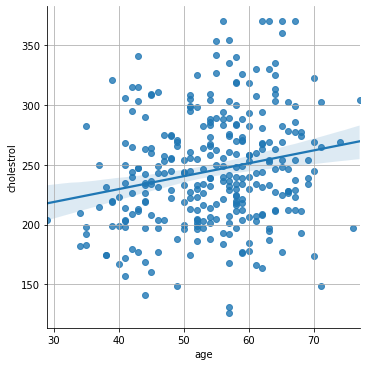

In [19]:
plt.figure(figsize=(8,7))
sns.lmplot(x='age',y='cholestrol',data=heart)


plt.grid()
plt.show()

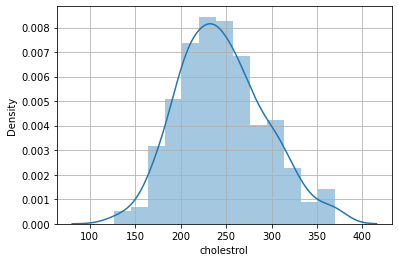

In [23]:
sns.distplot(heart['cholestrol'])
plt.grid()

In [18]:
heart[['cholestrol',"age"]].corr()

,cholestrol,age
cholestrol,1.000000,0.205888
age,0.205888,1.000000


in above regresssion graph we are getting insight that the relationship between cholestrol and age is weak positive 

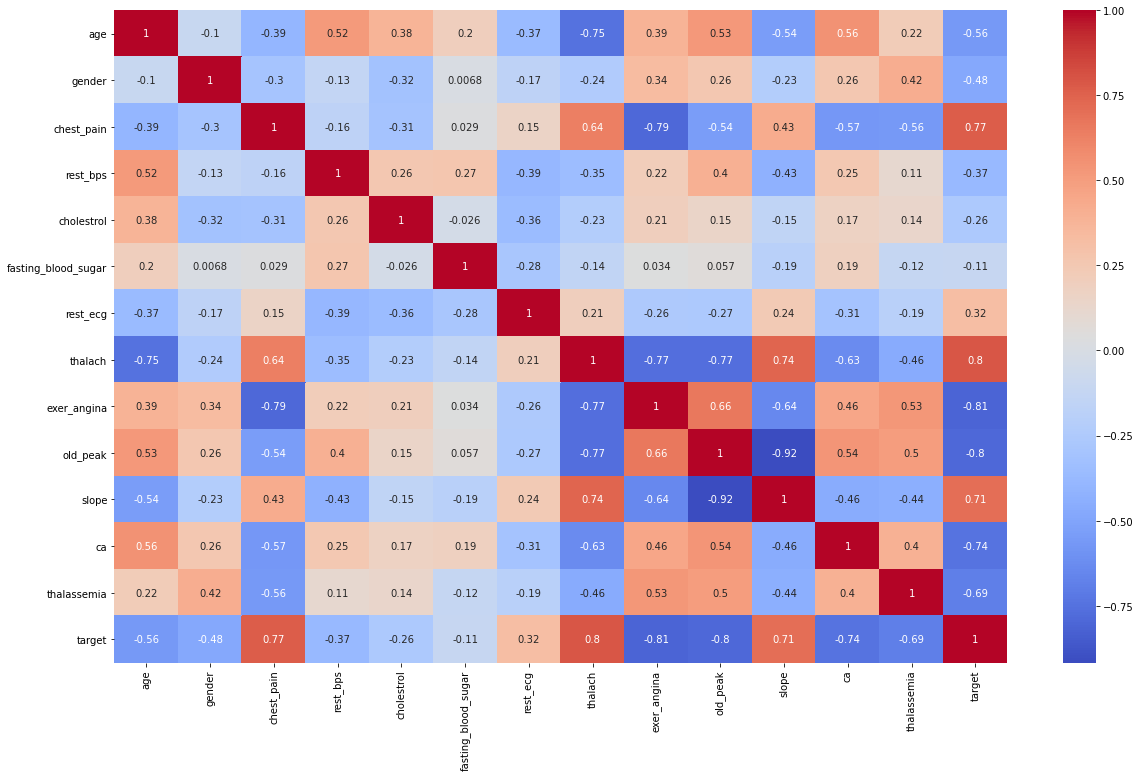

In [43]:
heart_cor=heart.corr()
corr_matrix = heart_cor.corr() 

# filter_corr = corr_matrix[corr_matrix > 0.5]
plt.figure(figsize=(20,12))
sns.heatmap(corr_matrix,cmap='coolwarm',annot=True);

<Figure size 576x504 with 0 Axes>

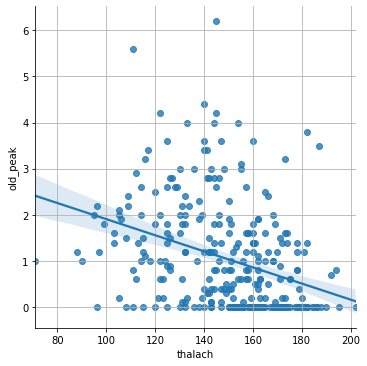

In [15]:
plt.figure(figsize=(8,7))
sns.lmplot(x='thalach',y='old_peak',data=heart)


plt.grid()
plt.show()

in above regresssion graph we are getting insight that the relationship between thalach and old_peak is weak positive 

In [16]:
heart[['thalach',"old_peak"]].corr()

,thalach,old_peak
thalach,1.000000,-0.344187
old_peak,-0.344187,1.000000


In [19]:
heart.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### checking out the frequency of category in targeted variable 

In [65]:
heart_scat=pd.DataFrame(heart['target'].value_counts())

In [66]:
heart_scat

,target
1,165
0,138


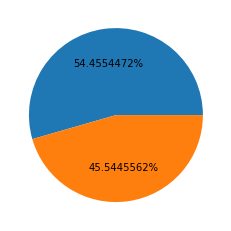

In [81]:
plt.pie(heart_scat["target"],autopct="%f2%%")
plt.show()

### In above pie we can see check the balance of the targeted variable 

In [13]:
# sns.scatterplot(data=heart, x="target", y="", hue="day", style="time")

In [12]:
heart.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
# plt.figure(figsize=(8,4))
# sns.heatmap((heart).corr())

### dividing the data into x and y

In [36]:
X=heart.drop(["target"],axis=1)
y=heart[["target"]]

splitting data the into train and test 

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=99)

### standardise the data by using MinMaxScaler

In [38]:
scale=MinMaxScaler()
X_train_scaled=scale.fit_transform(X_train)
X_test_scaled=scale.transform(X_test)

In [39]:
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_train.columns)

### KNN

In [40]:
k=[]
train_ac=[]
test_ac=[]
for i in range(3, 40, 2):
    knn2=KNeighborsClassifier(n_neighbors=i)
    knn2.fit(X_train_scaled, y_train)
    ac1=knn2.score(X_train_scaled, y_train)
    ac2=knn2.score(X_test_scaled, y_test)
    k.append(i)
    train_ac.append(ac1)
    test_ac.append(ac2)
    print("Train accuracy {} and Test accuracy {} for k {}".format(ac1, ac2, i))


Train accuracy 0.871900826446281 and Test accuracy 0.819672131147541 for k 3
Train accuracy 0.8553719008264463 and Test accuracy 0.8360655737704918 for k 5
Train accuracy 0.871900826446281 and Test accuracy 0.8032786885245902 for k 7
Train accuracy 0.8264462809917356 and Test accuracy 0.7868852459016393 for k 9
Train accuracy 0.8181818181818182 and Test accuracy 0.819672131147541 for k 11
Train accuracy 0.8181818181818182 and Test accuracy 0.819672131147541 for k 13
Train accuracy 0.8140495867768595 and Test accuracy 0.8032786885245902 for k 15
Train accuracy 0.8099173553719008 and Test accuracy 0.819672131147541 for k 17
Train accuracy 0.8016528925619835 and Test accuracy 0.819672131147541 for k 19
Train accuracy 0.8057851239669421 and Test accuracy 0.8524590163934426 for k 21
Train accuracy 0.7933884297520661 and Test accuracy 0.8524590163934426 for k 23
Train accuracy 0.7851239669421488 and Test accuracy 0.8524590163934426 for k 25
Train accuracy 0.7975206611570248 and Test accuracy

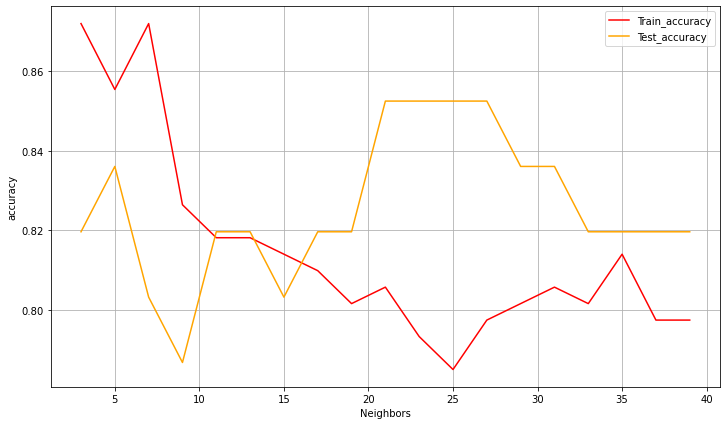

In [41]:
plt.figure(figsize=(12,7))
plt.plot(k, train_ac, label="Train_accuracy", color="red")
plt.plot(k, test_ac, label="Test_accuracy", color="orange")
plt.legend()
plt.xlabel("Neighbors")
plt.ylabel("accuracy")
plt.grid()
plt.show()


choosing the neighbours on the basis of graphs,  
in above graph we can see that train and test accuracy are close at 11,14and 16

### choosing neighbors at 16

In [1]:
knn1=KNeighborsClassifier(n_neighbors=16)
knn1.fit(X_train_scaled,y_train)
print("test",knn1.score(X_test_scaled,y_test))
print("train",knn1.score(X_train_scaled,y_train))

NameError: name 'KNeighborsClassifier' is not defined

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [22]:
rf=RandomForestClassifier()
dt=DecisionTreeClassifier()
log=LogisticRegression()

### Logistic regression

In [23]:
model=log.fit(X_train_scaled,y_train)


F:\conda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [24]:
print("Accuracy of train", model.score(X_train_scaled, y_train))
print("Accuracy of test", model.score(X_test_scaled, y_test))

Accuracy of train 0.8388429752066116
Accuracy of test 0.9016393442622951


### decision tree

In [25]:
dt.fit(X_train_scaled,y_train)
print("Train score:",dt.score(X_train_scaled,y_train))
print("Train score:",dt.score(X_test_scaled,y_test))

Train score: 1.0
Train score: 0.8360655737704918


In [26]:
# help(dt)

### hyperparameter tuning 

In [27]:

from sklearn.model_selection import GridSearchCV

parameters = {'criterion':('gini', 'entropy'), 
              'min_samples_split':[2,3,4,5], 
              'max_depth':[2,4,6,8,9,10,11],
              "min_samples_leaf":[2,5,10]
             }


dt1=DecisionTreeClassifier()

dt_gs = GridSearchCV(dt1, parameters, cv=10, verbose=1, n_jobs=-1)

dt_gs.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 168 candidates, totalling 1680 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [2, 4, 6, 8, 9, 10, 11],
                         'min_samples_leaf': [2, 5, 10],
                         'min_samples_split': [2, 3, 4, 5]},
             verbose=1)

### get the best parameters

In [28]:
dt_gs.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 10,
 'min_samples_split': 2}

In [29]:
dt3=DecisionTreeClassifier(max_depth=6,criterion='entropy',min_samples_leaf=10,min_samples_split=3)
dt3.fit(X_train_scaled,y_train)
print('train',dt3.score(X_train_scaled,y_train))
print('test',dt3.score(X_test_scaled,y_test))


train 0.8636363636363636
test 0.8524590163934426


In [30]:
train_pred=dt3.predict(X_train_scaled)
test_pred=dt3.predict(X_test_scaled)

### Classification report 

In [31]:
print('train',metrics.classification_report(train_pred,y_train))


train               precision    recall  f1-score   support

           0       0.84      0.87      0.85       112
           1       0.88      0.86      0.87       130

    accuracy                           0.86       242
   macro avg       0.86      0.86      0.86       242
weighted avg       0.86      0.86      0.86       242



In [32]:
print('test',metrics.classification_report(test_pred,y_test))

test               precision    recall  f1-score   support

           0       0.78      0.82      0.80        22
           1       0.89      0.87      0.88        39

    accuracy                           0.85        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.85      0.85      0.85        61



# **_Random forest_**

In [33]:
rf.fit(X_train_scaled,y_train)
print('train',rf.score(X_train_scaled,y_train))
print('test',rf.score(X_test_scaled,y_test))

<ipython-input-33-373f14934cf4>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_scaled,y_train)


train 1.0
test 0.8524590163934426


In [79]:
from sklearn.model_selection import GridSearchCV

parameters = {'criterion':('gini', 'entropy'), 
              'min_samples_split':[2,3,4,5], 
              'max_depth':[2,4,6,8,9,10,11],
              "min_samples_leaf":[2,5,10],"bootstrap":[True,False]
             }


rf1 =RandomForestClassifier()

rf_gs = GridSearchCV(rf1, parameters, cv=5, verbose=1, n_jobs=-1)

rf_gs.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 336 candidates, totalling 1680 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ('gini', 'entropy'),
                         'max_depth': [2, 4, 6, 8, 9, 10, 11],
                         'min_samples_leaf': [2, 5, 10],
                         'min_samples_split': [2, 3, 4, 5]},
             verbose=1)

### get the best parameters 

In [80]:
rf_gs.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 10,
 'min_samples_split': 5}

In [81]:
rf2=RandomForestClassifier(criterion='gini',max_depth=3,min_samples_leaf=5,min_samples_split=3,bootstrap=False,random_state=100)
rf2.fit(X_train_scaled,y_train)
print('train',rf2.score(X_train_scaled,y_train))
print('test',rf2.score(X_test_scaled,y_test))

train 0.8884297520661157
test 0.8852459016393442


In [66]:
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

In [38]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()  # Turns into Z score 
# X_train_std = sc.fit_transform(X_train)
# X_test_std = sc.transform(X_test)
# X_train_std1=pd.DataFrame(X_train_std, columns=X_train.columns)
# X_test_std1=pd.DataFrame(X_test_std, columns=X_test.columns)

### _XG boost_

In [39]:
xgb=XGBClassifier()

In [61]:
xgb.fit(X_train_scaled,y_train)
print('train score',xgb.score(X_train_scaled,y_train))
print('test score',xgb.score(X_test_scaled,y_test))

[19:19:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train score 1.0
test score 0.8524590163934426


In [41]:
# help(xgb)

In [42]:
# from sklearn.model_selection import GridSearchCV
# params={"n_estimators":[50, 100,150, 200, 250, 300, 350],
#        "learning_rate":[1, .1, .01, .001]}
# adb2=AdaBoostClassifier()
# adb_gs=GridSearchCV(adb2, param_grid=params, cv=10, n_jobs=-1, verbose=1)
# adb_gs.fit(X_train_std1, ytrain)



params={"n_estimators":[50, 100, 150,200, 250],
       "max_depth":[5, 7,9, 11, 13, 15],
#        "min_child_weight":[],
#        "subsample":['float'],
#        "colsample_bytree":['int64']
#        "reg_alpha":[],
#        "reg_lambda":[]
       }
xgb1=XGBClassifier()
xgb_gs=GridSearchCV(xgb1, param_grid=params, cv=5, n_jobs=-1, verbose=1)
xgb_gs.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


F:\conda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
F:\conda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[19:14:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [43]:
xgb_gs.best_params_


{'max_depth': 5, 'n_estimators': 100}

In [44]:
xgb2=XGBClassifier(max_depth=5,n_estimators=100 )
xgb2.fit(X_train_scaled,y_train)
print("Train Score ", xgb2.score(X_train_scaled, y_train))
print("Test Score",xgb2.score(X_test_scaled, y_test))

[19:14:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train Score  1.0
Test Score 0.8360655737704918


In [45]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()  # Turns into Z score 
# X_train_std = sc.fit_transform(Xtrain)
# X_test_std = sc.transform(Xtest)
# X_train_std1=pd.DataFrame(X_train_std, columns=Xtrain.columns)
# X_test_std1=pd.DataFrame(X_test_std, columns=Xtest.columns)


## _Adaboost_

In [67]:
adb=AdaBoostClassifier()

In [47]:
adb.fit(X_train_scaled, y_train)
print("Train Score ", adb.score(X_train_scaled, y_train))
print("Test Score",adb.score(X_test_scaled, y_test) )

F:\conda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Train Score  0.9421487603305785
Test Score 0.8524590163934426


### hyperparameter tuning by applying gridsearch 

In [66]:

from sklearn.model_selection import GridSearchCV
params={"n_estimators":[50, 100,150, 200, 250, 300, 350],
       "learning_rate":[1, .1, .01, .001]}

adb2=AdaBoostClassifier()
adb_gs=GridSearchCV(adb2, param_grid=params, cv=10, n_jobs=-1, verbose=1)
adb_gs.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


GridSearchCV(cv=10, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [1, 0.1, 0.01, 0.001],
                         'n_estimators': [50, 100, 150, 200, 250, 300, 350]},
             verbose=1)

### get the best parameteres 

In [67]:
adb_gs.best_params_

{'learning_rate': 0.01, 'n_estimators': 350}

In [76]:
adb1=AdaBoostClassifier(n_estimators=350, learning_rate=.03, random_state=88)
adb1.fit(X_train_scaled, y_train)
print("Train Score ", adb1.score(X_train_scaled, y_train))
print("Test Score",adb1.score(X_test_scaled, y_test))

Train Score  0.8760330578512396
Test Score 0.8852459016393442


In [14]:
# num = 20
# x, y = np.random.random((2, num))
# labels = np.random.choice(['a', 'b', 'c'], num)
# df = pd.DataFrame(dict(x=x, y=y, label=labels))

# groups = df.groupby('label')

# # Plot
# fig, ax = plt.subplots()
# ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
# for name, group in groups:
#     ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=name)
# ax.legend()

# plt.show()

In [42]:
# heart=heart.groupby(['target'])
# fig, ax = plt.subplots()
# ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
# for name, tar in heart:
#     ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=name)
# ax.legend()

# plt.show()

>>**_Now we can see that every model is working quite fine on this data     
>>except XGboost the reason may be the less amount of variable or less amount of data_**